

> Indented block



**Welcome to data analysis and preprocessing section !!!!**

So, what are we actually going to do?

we are going to explore the following questions:






*  Create new feature from the existing one which we found out from study that it impacts this disease.


*   What is the correlation between variables? Can we expect any relationship? Can we expect a value for the person’s blood pressure when we know his/her age?

*   Based on a person’s health profile, can we predict if a person is likely to have CVD?





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('cardio_train.csv',sep=';')

In [ ]:
data.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [ ]:
data.shape

(70000, 13)

from here, we can conclude data has 70000 entries and 13 features.

In [ ]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

from this we can conclude, No feature has any missing value.

**My plan for data preparation:**



*  drop duplicated rows if any.
*  drop any unusual feature.


*   Identify Outliers and remove them



*   convert age from days to years.
*   create a column for ranges of age.

*   create a column for body mass index (bmi).
*   create a column for state of blood pressure.














In [ ]:
data.duplicated().sum()

0

There is no duplicate entries rows in dataset.

In [ ]:
data.drop('id',axis=1,inplace=True)

In [ ]:
data.describe()  #height and weight have outliers

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


from this we can observe and identify the outliers. like min and max of weight and height deosn't make sense. So, we will remove them as it will wrongly deviate our model.

<ipython-input-63-c441d67e3756>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['height'])
<ipython-input-63-c441d67e3756>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['weight'])


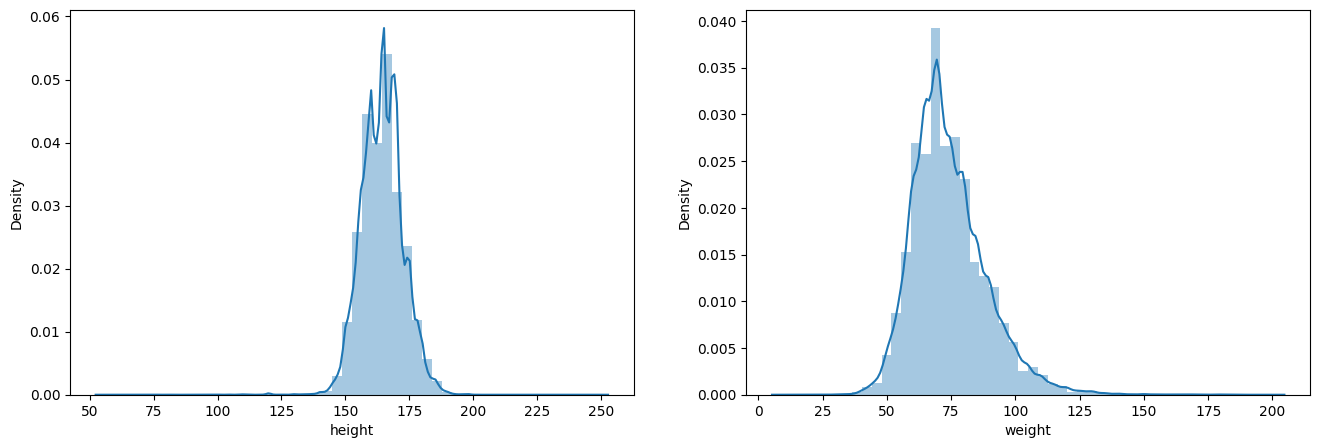

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['height'])

plt.subplot(1,2,2)
sns.distplot(data['weight'])

plt.show()


In [ ]:
data['height'].skew() #moderately skewed

-0.6421874521557643

In [ ]:
data['weight'].skew() #highly skewed

1.0120701082089065

**we can see from the graph, height is left skewed and weight is right skewed.** Since, data is highly skewed, we can conclude it isnt normal distribution.Hence, both height and weight **OUTLIERS** should be handled using IQR method.

In [ ]:
data['height'].describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [ ]:
data['weight'].describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

Text(0, 0.5, 'height')

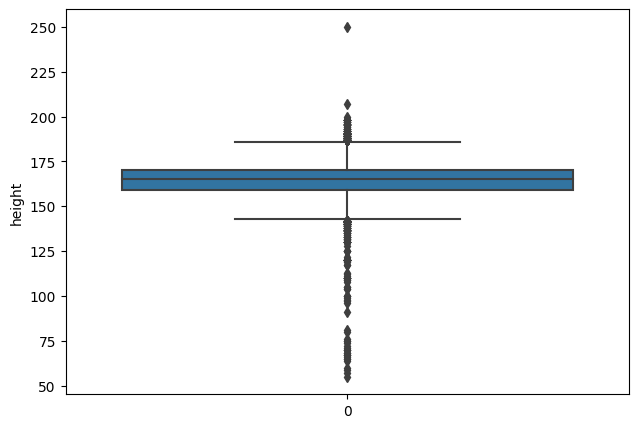

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(data['height'])
plt.ylabel("height")       #75%


In [ ]:
#finding the IQR
percentile25= data['height'].quantile(0.25)
percentile75= data['height'].quantile(0.75)

In [ ]:
iqr_height=percentile75-percentile25
iqr_height

11.0

In [ ]:
upper_limit= percentile75 + 1.5*iqr_height
lower_limit= percentile25 - 1.5* iqr_height

print("upper_limit_for_height: ",upper_limit)
print("lower_limit_for_height: ",lower_limit)

upper_limit_for_height:  186.5
lower_limit_for_height:  142.5


In [ ]:
mask1=data['height'] >upper_limit
mask2=data['height']< lower_limit
data[mask1 | mask2].shape[0]

519

In [ ]:
m1=data['height']<upper_limit
m2=data['height']>lower_limit
new_data=data[m1 & m2]
new_data.shape

(69481, 12)

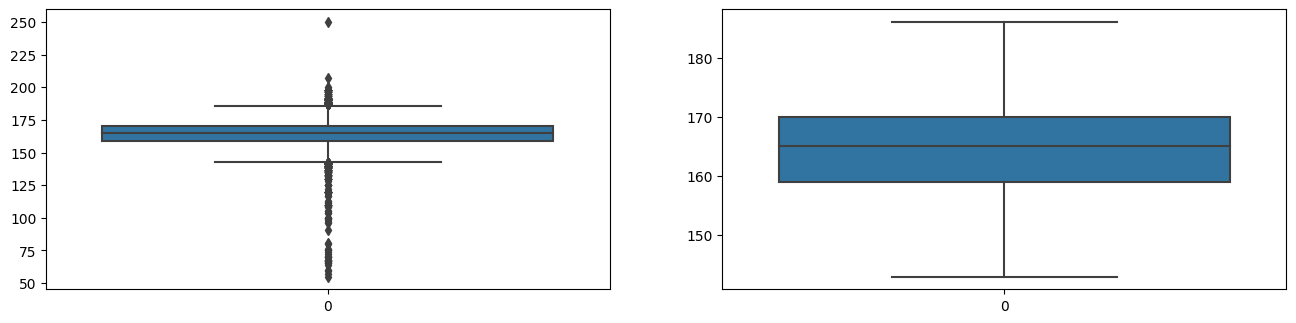

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(data['height'])
plt.subplot(2,2,2)
sns.boxplot(new_data['height'])
plt.show()

**Finding Outlier for Weight**

<Axes: >

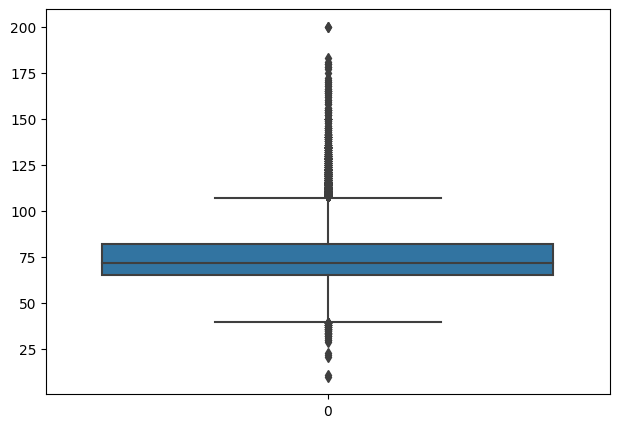

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(new_data['weight'])

In [ ]:
percentile25_w= new_data['weight'].quantile(0.25)
percentile75_w= new_data['weight'].quantile(0.75)

In [ ]:
iqr_weight=percentile75_w-percentile25_w
iqr_weight

17.0

In [ ]:
upper_limit_weight= percentile75_w + 1.5*iqr_weight
lower_limit_weight= percentile25_w - 1.5* iqr_weight
print("upper_limit_for_weight: ",upper_limit_weight)
print("lower_limit_for_weight: ",lower_limit_weight)

upper_limit_for_weight:  107.5
lower_limit_for_weight:  39.5


In [ ]:
mask1_weight=new_data['weight'] >upper_limit_weight
mask2_weight=new_data['weight']< lower_limit_weight
new_data[mask1_weight| mask2_weight].shape[0]

1758

In [ ]:
# n1=new_data['weight']<upper_limit_weight
# n2=new_data['weight']>lower_limit_weight
# new_data_cap=new_data[n1 & n2]
# new_data_cap.shape

A large section of weight is in outliers. So, instead of removing them, we should use the technique of capping.

In [ ]:
new_data_cap = new_data.copy()

new_data_cap['weight'] = np.where(   #if
    new_data_cap['weight'] > upper_limit_weight,
     upper_limit_weight,
    np.where(    #elseif
        new_data_cap['weight'] < lower_limit_weight,
         lower_limit_weight,
        new_data_cap['weight']    #else
    )
)

In [ ]:
new_data_cap.shape

(69481, 12)

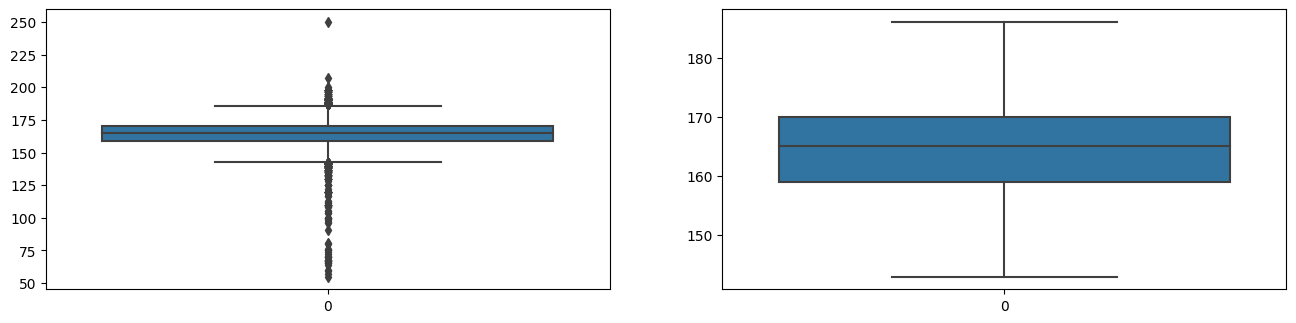

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.xlabel("")
sns.boxplot(data['height'])
plt.subplot(2,2,2)
sns.boxplot(new_data_cap['height'])
plt.show()

Now, moving ahead,Blood flows through our body because of a difference in
pressure.Our blood pressure is highest at the start of its journey from our heart ( when it enters the aorta )and it is lowest at the end of its journey along progressively smaller branches of arteries.

The systolic pressure (ap_hi) is the higher figure caused by the heart’s contraction, while the diastolic number (ap_lo) is the lower pressure in the arteries.

Therefore, ap_hi should be higher thatn ap_low, and they cannot be negative.Hence, we should remove the negative ones and also, the one where ap_hi is lower.


In [ ]:
new_data_cap[new_data_cap['ap_hi'] < new_data_cap['ap_lo']].shape[0]

1221

In 1221 obeservation ap_hi is lower than ap_low, which is incorrect. So,we should remove them.

In [ ]:
new_data_cap = new_data_cap[new_data_cap['ap_hi'] > new_data_cap['ap_lo']].reset_index(drop=True)

In [ ]:
new_data_cap.shape

(68258, 12)

In [ ]:
def blood_pressure(new_data_cap):
    if (new_data_cap['ap_hi'] <= 120) and (new_data_cap['ap_lo'] <= 80):
        return 1    #normal
    if (new_data_cap['ap_hi'] >= 120 and new_data_cap['ap_hi'] < 129) and (new_data_cap['ap_lo'] < 80):
        return 2    #thoda sa
    if (new_data_cap['ap_hi'] >= 129 and new_data_cap['ap_hi'] <= 179) | (new_data_cap['ap_lo'] >= 89):
        return 3    #very high
    if (new_data_cap['ap_hi'] >= 180) | (new_data_cap['ap_lo'] >= 120):
        return 4    #crisis

new_data_cap['blood_pressure'] = new_data_cap.apply(blood_pressure, axis=1)

here, we created a feature of blood pressure as it is key factor to know in heart related disease.

In [ ]:
new_data_cap['age'] = round(new_data_cap['age']/365)

since, the age was in days so we converted it into years.

---



In [ ]:
print('Min Age: ', new_data_cap['age'].min())
print('Max Age: ', new_data_cap['age'].max())
print('Mean Age: ', new_data_cap['age'].mean())

new_data_cap['age_range'] = new_data_cap['age'].apply(
    lambda x: 1 if (x >=30 and x <= 40) else (2 if (x>40 and x<=48) else 3))

Min Age:  30.0
Max Age:  65.0
Mean Age:  53.32900172873509


We created new feature of age_range by observing min,max and mean age value.

from studying many papers and articles on this topic, we concluded that BMI feature is essential and hence we calculated it. Also, using standard weight status categories associated with BMI ranges, we created its range new feature.

In [ ]:
def BMI(new_data_cap):
    return new_data_cap['weight'] / (new_data_cap['height']/100)**2

new_data_cap['bmi'] = new_data_cap.apply(BMI, axis=1)

In [ ]:
corr = new_data_cap.corr()

corr.style.background_gradient(cmap='BuGn')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,blood_pressure,age_range,bmi
age,1.000000,-0.022172,-0.086414,0.062738,0.020287,0.153764,0.155649,0.099172,-0.047392,-0.028259,-0.010462,0.239356,0.195201,0.799658,0.111511
gender,-0.022172,1.000000,0.525604,0.158932,0.005933,0.066055,-0.036907,-0.021281,0.338754,0.171111,0.006419,0.007096,0.036126,-0.038216,-0.119018
height,-0.086414,0.525604,1.000000,0.312440,0.005876,0.035689,-0.057111,-0.021365,0.197355,0.097599,-0.007854,-0.012286,-0.016890,-0.067868,-0.208240
weight,0.062738,0.158932,0.312440,1.000000,0.030207,0.252242,0.143565,0.105839,0.066877,0.067536,-0.017632,0.183847,0.260100,0.053246,0.859977
ap_hi,0.020287,0.005933,0.005876,0.030207,1.000000,0.075812,0.022727,0.011505,-0.001381,0.001450,-0.000491,0.053037,0.107670,0.015863,0.028332
ap_lo,0.153764,0.066055,0.035689,0.252242,0.075812,1.000000,0.157313,0.073926,0.025429,0.036364,-0.001877,0.332429,0.608271,0.131866,0.240126
cholesterol,0.155649,-0.036907,-0.057111,0.143565,0.022727,0.157313,1.000000,0.450546,0.009753,0.035641,0.008627,0.221072,0.227459,0.116916,0.176817
gluc,0.099172,-0.021281,-0.021365,0.105839,0.011505,0.073926,0.450546,1.000000,-0.005768,0.010092,-0.007926,0.089124,0.103389,0.077478,0.119153
smoke,-0.047392,0.338754,0.197355,0.066877,-0.001381,0.025429,0.009753,-0.005768,1.000000,0.340636,0.025288,-0.016501,0.032920,-0.039015,-0.037044
alco,-0.028259,0.171111,0.097599,0.067536,0.001450,0.036364,0.035641,0.010092,0.340636,1.000000,0.024509,-0.008339,0.042273,-0.020542,0.016375


In [ ]:
new_data_cap.drop(['gender','height','ap_hi','smoke','alco','active'], axis = 1, inplace = True)

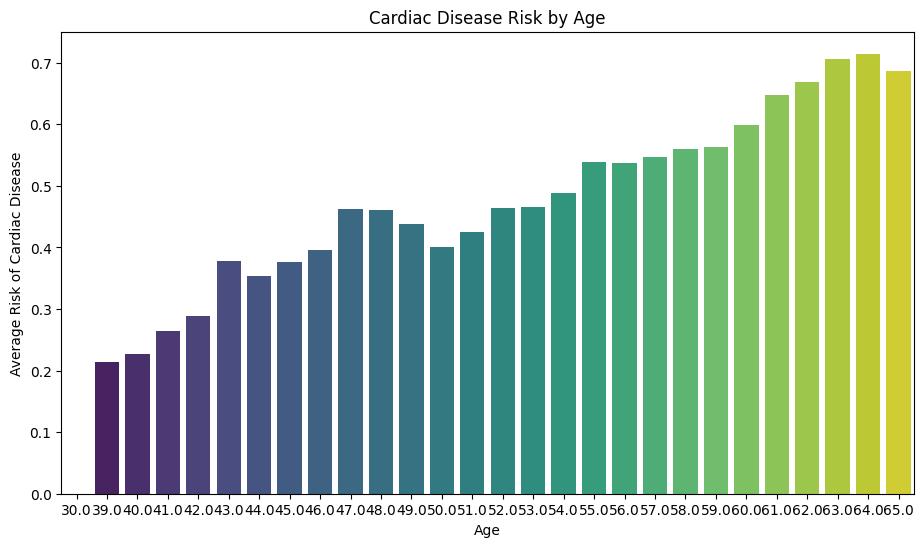

In [ ]:
age_cardio = pd.DataFrame({
    'The Cardiac disease by average': new_data_cap.groupby('age')['cardio'].mean(),
    'Age': sorted(new_data_cap['age'].unique())
})
plt.figure(figsize=(11,6))
sns.barplot(x='Age', y='The Cardiac disease by average', data=age_cardio, palette='viridis')
plt.title('Cardiac Disease Risk by Age')
plt.xlabel('Age')
plt.ylabel('Average Risk of Cardiac Disease')
plt.show()

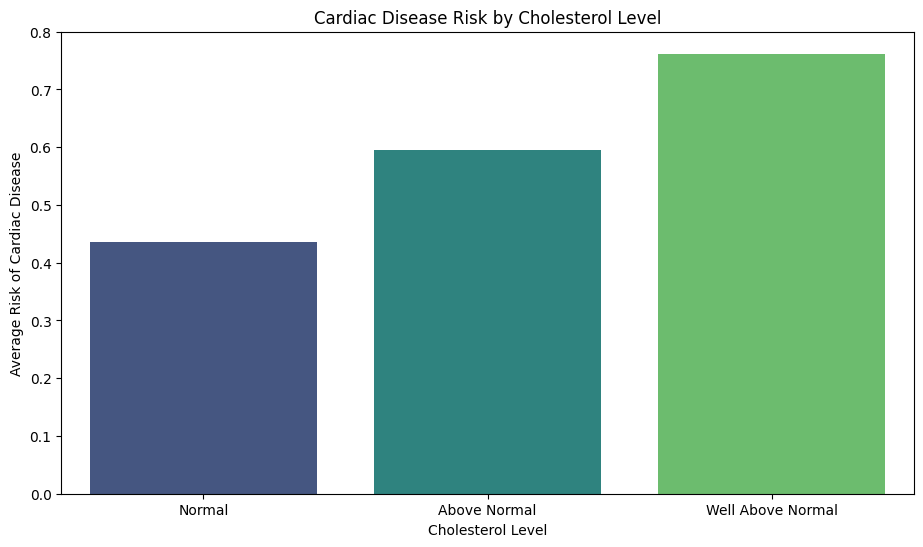

In [ ]:
age_chol = pd.DataFrame({
    'The Cardiac disease by average':new_data_cap.groupby('cholesterol')['cardio'].mean(),
    'The amount of Cholesterol': ['Normal', 'Above Normal', 'Well Above Normal']
})

# Create a bar plot using Seaborn
plt.figure(figsize=(11,6))
sns.barplot(x='The amount of Cholesterol', y='The Cardiac disease by average', data=age_chol, palette='viridis')
plt.title('Cardiac Disease Risk by Cholesterol Level')
plt.xlabel('Cholesterol Level')
plt.ylabel('Average Risk of Cardiac Disease')
plt.show()

In [ ]:
new_data_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68258 entries, 0 to 68257
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             68258 non-null  float64
 1   weight          68258 non-null  float64
 2   ap_lo           68258 non-null  int64  
 3   cholesterol     68258 non-null  int64  
 4   gluc            68258 non-null  int64  
 5   cardio          68258 non-null  int64  
 6   blood_pressure  67768 non-null  float64
 7   age_range       68258 non-null  int64  
 8   bmi             68258 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 4.7 MB


In [ ]:
new_data_cap.isnull().sum() #because of new features we can get null values

age                 0
weight              0
ap_lo               0
cholesterol         0
gluc                0
cardio              0
blood_pressure    490
age_range           0
bmi                 0
dtype: int64

In [ ]:
new_data_cap.dropna(inplace=True)

In [ ]:
x = new_data_cap.iloc[:,[0,1,2,3,4,6,7,8]]
y = new_data_cap.iloc[:,[5]]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_X = scaler.fit_transform(x)

<ipython-input-100-7328ca961e31>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_clf.fit(X_train, y_train)


Accuracy: 71.95918883595431
ROC-AUC: 0.7783826854377228


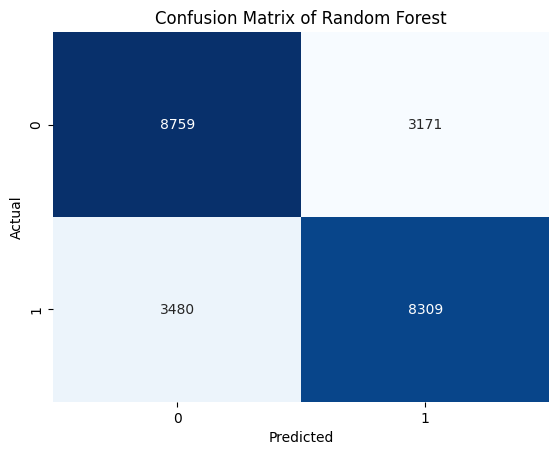

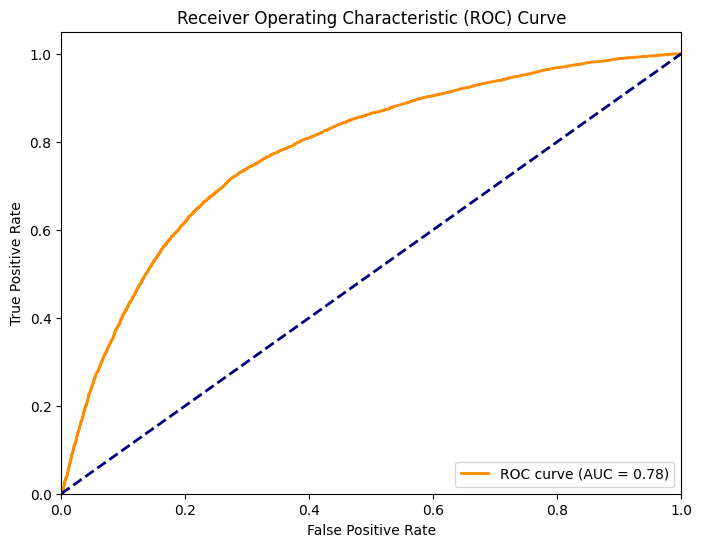

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Replace 'df' with 'new_data_cap' in the following code
X = new_data_cap.drop(columns=['cardio'])
y = new_data_cap['cardio'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(standard_X, y, test_size=0.35, random_state=1)

RF_clf = RandomForestClassifier(n_estimators=50, max_depth=9)
RF_clf.fit(X_train, y_train)

# Calculate the probabilities of the positive class (class 1)
y_prob = RF_clf.predict_proba(X_test)[:, 1]

# Get the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Print the accuracy and AUC
y_pred = RF_clf.predict(X_test)
print("Accuracy:", 100 * metrics.accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc)

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest')
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 70.66
ROC-AUC: 0.762556844271397


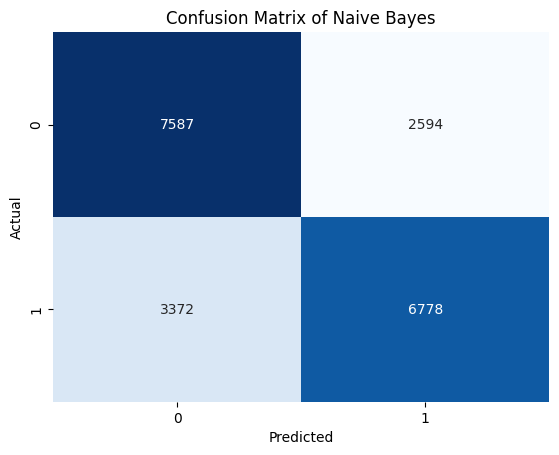

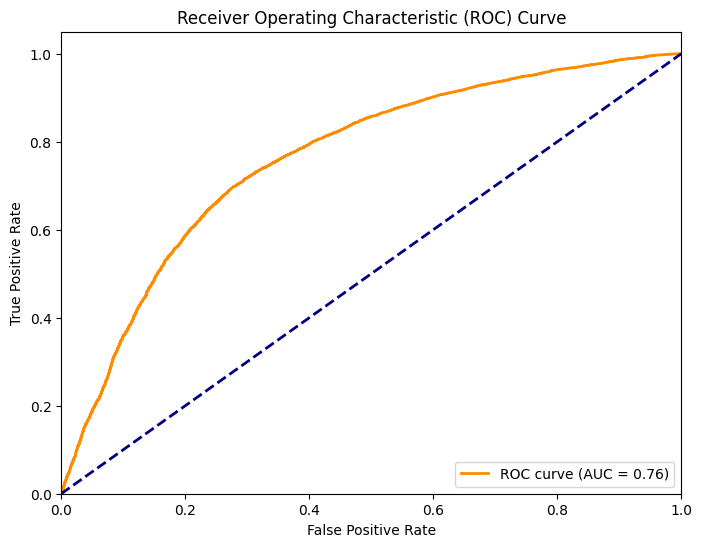

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Replace 'df' with 'new_data_cap' in the following code
X = new_data_cap.drop(columns=['cardio'])
y = new_data_cap['cardio'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(standard_X, y, test_size=0.30, random_state=0)

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

# Calculate the probabilities of the positive class (class 1)
y_prob = gaussian.predict_proba(X_test)[:, 1]

# Get the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Print the accuracy and AUC
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_test_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
print("Accuracy:", acc_test_gaussian)
print("ROC-AUC:", roc_auc)

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_matrix(y_test, gaussian.predict(X_test)), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Naive Bayes')
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()





In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree
acc_test_decision_tree = round(decision_tree.score(X_test,y_test) * 100, 2)
acc_test_decision_tree

62.61

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


72.19

In [ ]:
acc_test_svc = round(svc.score(X_test,y_test) * 100, 2)
acc_test_svc

72.38